In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
walmart_data_actual= pd.read_csv("/Users/nivzz/Downloads/Walmart_Store_sales.csv")

In [4]:
walmart_data=walmart_data_actual.copy()

In [5]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/10,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/10,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/10,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
#changing Date to one format
walmart_data['Date']=pd.to_datetime(walmart_data['Date'], utc=False)
#walmart_data['Date'] = pd.to_datetime(walmart_data.Date)
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null datetime64[ns]
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [10]:
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
walmart_data.corr() #Holiday_flag & store | Fuel_price & Holiday_flag (-)|

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,6.250842e-20,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,6.250842e-20,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


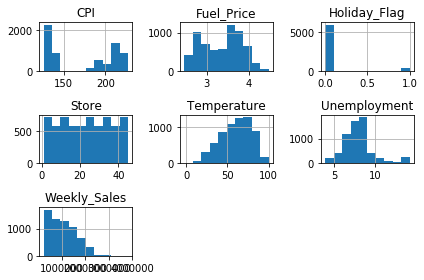

In [9]:
walmart_data.hist()
plt.tight_layout()

In [10]:
#checking all unique unemployment rate
unique_employment_index=walmart_data['Unemployment'].unique()

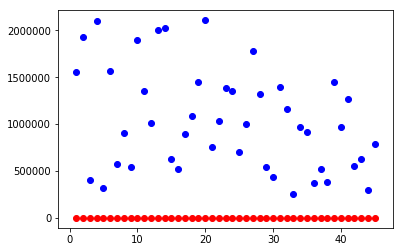

In [11]:
#Scatter plot between Unemployment vs Weekly Sales per store
y=walmart_data[['Unemployment']].groupby(walmart_data['Store'])['Unemployment'].median()
z=walmart_data.groupby(walmart_data['Store'])['Weekly_Sales'].mean()
x=range(1,46)
plt.scatter(x,y,c='r')
plt.scatter(x,z,c='b')

plt.show()

In [12]:
#Store that has maximum sale
Max_sale=walmart_data.loc[[walmart_data['Weekly_Sales'].idxmax()]]
Max_sale

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724


In [13]:
#Top 10 Weekly_sales
val=walmart_data.sort_values(by='Weekly_Sales', ascending=False)
val.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795
1814,13,2011-12-23,3556766.03,0,24.76,3.186,129.984548,6.392
2815,20,2011-12-23,3555371.03,0,40.19,3.389,212.236040,7.082
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127
1385,10,2011-12-23,3487986.89,0,48.36,3.541,129.984548,7.874
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163


In [14]:
#Updating the Date column to year-month-date format
walmart_data['Date'] = pd.to_datetime(walmart_data.Date)
walmart_data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


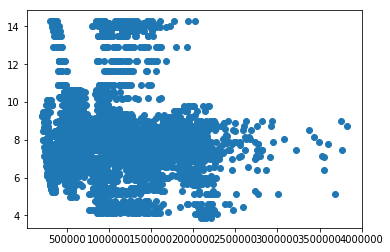

In [141]:
x=walmart_data.Weekly_Sales
y=walmart_data.Unemployment
plt.scatter(x,y)


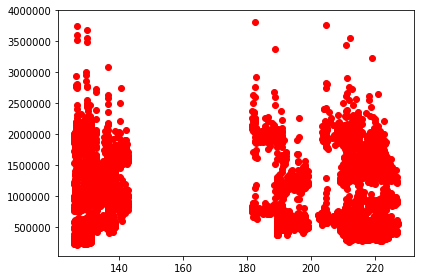

In [22]:
y=walmart_data.Weekly_Sales
x=walmart_data.CPI
plt.scatter(x,y,c='r')
plt.tight_layout()

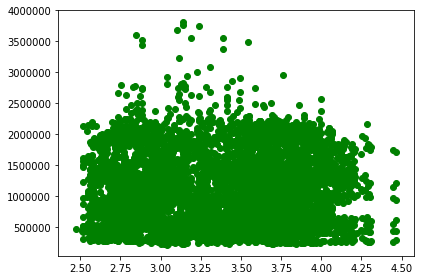

In [23]:
x=walmart_data.Fuel_Price
y=walmart_data.Weekly_Sales
plt.scatter(x,y,c='g')
plt.tight_layout()


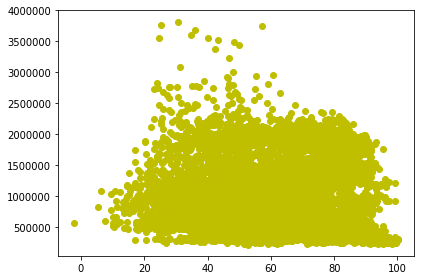

In [24]:
x=walmart_data.Temperature
y=walmart_data.Weekly_Sales
plt.scatter(x,y,c='y')
plt.tight_layout()

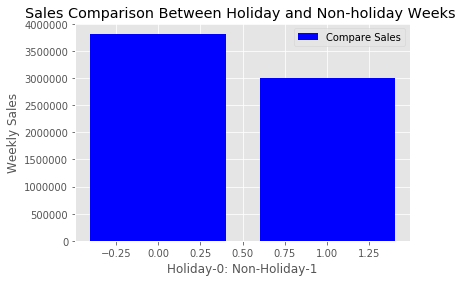

<Figure size 432x288 with 0 Axes>

In [7]:
#holiday shopping mainly before the holiday week.
fig,ax=plt.subplots()
x=walmart_data.Holiday_Flag
y=walmart_data.Weekly_Sales
plt.bar(x,y,color='b',label='Compare Sales')
ax.set_xlabel('Holiday-0: Non-Holiday-1')
ax.set_ylabel('Weekly Sales')
ax.legend()
ax.grid(b=True, which='minor', linestyle='-')
ax.set_title("Sales Comparison Between Holiday and Non-holiday Weeks ")
plt.show()
plt.tight_layout()


In [8]:
plt.savefig('bar_holiday_weeks',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


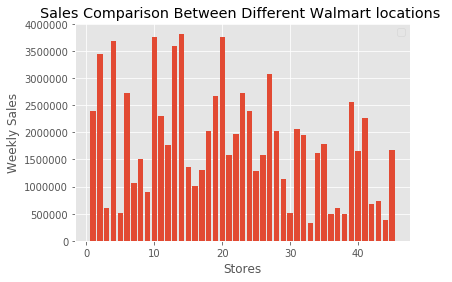

<Figure size 432x288 with 0 Axes>

In [44]:
#location is important for high weekly sales
fig,ax=plt.subplots()
x=walmart_data.Store
y=walmart_data.Weekly_Sales
plt.bar(x,y)
ax.set_xlabel('Stores')
ax.set_ylabel('Weekly Sales')
ax.legend()
ax.grid(b=True, which='minor', linestyle='-')
ax.set_title("Sales Comparison Between Different Walmart locations ")
plt.show()
plt.tight_layout()

In [82]:
#Top 20 sales
df_top_20_sales=walmart_data[['Weekly_Sales','Store','Date','CPI','Fuel_Price','Unemployment']].sort_values(by='Weekly_Sales',ascending=False).head(50)
df_top_20_sales

,Weekly_Sales,Store,Date,CPI,Fuel_Price,Unemployment
1905,3818686.45,14,2010-12-24,182.544590,3.141,8.724
2763,3766687.43,20,2010-12-24,204.637673,3.141,7.484
1333,3749057.69,10,2010-12-24,126.983581,3.236,9.003
527,3676388.98,4,2011-12-23,129.984548,3.103,5.143
1762,3595903.20,13,2010-12-24,126.983581,2.846,7.795
1814,3556766.03,13,2011-12-23,129.984548,3.186,6.392
2815,3555371.03,20,2011-12-23,212.236040,3.389,7.082
475,3526713.39,4,2010-12-24,126.983581,2.887,7.127
1385,3487986.89,10,2011-12-23,129.984548,3.541,7.874
189,3436007.68,2,2010-12-24,211.064660,2.886,8.163


In [47]:
std_max_sale=walmart_data.groupby('Store').std()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False).head(1)
std_max_sale

,Weekly_Sales
Store,
14,317569.949476


In [88]:
#Walmart location wise sales mean and standard deviation in sales.

result = walmart_data.groupby('Store').agg({'Weekly_Sales':['mean','std']})
result

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745
6      1.564728e+06  212525.855862
7      5.706173e+05  112585.469220
8      9.087495e+05  106280.829881
9      5.439806e+05   69028.666585
10     1.899425e+06  302262.062504
11     1.356383e+06  165833.887863
12     1.009002e+06  139166.871880
13     2.003620e+06  265506.995776
14     2.020978e+06  317569.949476
15     6.233125e+05  120538.652043
16     5.192477e+05   85769.680133
17     8.935814e+05  112162.936087
18     1.084718e+06  176641.510839
19     1.444999e+06  191722.638730
20     2.107677e+06  275900.562742
21     7.560691e+05  128752.812853
22     1.028501e+06  161251.350631
23     1.389864e+06  249788.038068
24     1.356755e+06  167745.677567
25     7.067215e+05  112976.788600
26     1.002912e+06  110431.288141
27     1.775216e+06  239930.135688
28     1.323522e+06  181758.967539
29     5.394514e+05   99120.136596
30     4.385796e+05   22809.665590
31     1.395901e+06  125855.942933
32     1.166568e+06  138017.252087
33     2.598617e+05   24132.927322
34     9.667816e+05  104630.164676
35     9.197250e+05  211243.457791
36     3.735120e+05   60725.173579
37     5.189003e+05   21837.461190
38     3.857317e+05   42768.169450
39     1.450668e+06  217466.454833
40     9.641280e+05  119002.112858
41     1.268125e+06  187907.162766
42     5.564039e+05   50262.925530
43     6.333247e+05   40598.413260
44     3.027489e+05   24762.832015
45     7.859814e+05  130168.526635

In [49]:
# total Date duration of the dataset
print(walmart_data.Date.max())
print(walmart_data.Date.min())

2012-12-10 00:00:00
2010-01-10 00:00:00


In [50]:
#2012 Quarter 3 sales

start2012='2012-07-1'
end2012='2012-9-30'
df_quarterly_after=walmart_data[walmart_data.Date.between(start2012,end2012)]

In [51]:
quar3_2012_after=df_quarterly_after.groupby('Store').sum()[['Weekly_Sales']]
quar3_2012_after.head()

,Weekly_Sales
Store,
1,18633209.98
2,22396867.61
3,4966495.93
4,25652119.35
5,3880621.88


In [52]:
#2012 quarter 2 sales

startq2='2012-04-1'
endq2='2012-06-30'
quar2_2012=walmart_data[walmart_data.Date.between(startq2,endq2)]

In [53]:
quar2_2012_before=quar2_2012.groupby('Store').sum()[['Weekly_Sales']]
quar2_2012_before.head()

,Weekly_Sales
Store,
1,21036965.58
2,25085123.61
3,5562668.16
4,28384185.16
5,4427262.21


In [54]:
#2012 Quarter 1 sales

startq1='2012-01-01'
endq1='2012-03-30'
quar1_2012=walmart_data[walmart_data.Date.between(startq1,endq1)]
quar1_2012_before=quar1_2012.groupby('Store').sum()[['Weekly_Sales']]
quar1_2012_before.head()

,Weekly_Sales
Store,
1,18951097.69
2,22543946.63
3,4957435.81
4,25659307.85
5,3912829.61


In [55]:
#2012 Quarter 4 sales

startq4='2012-10-01'
endq4='2012-12-30'
quar4_2012=walmart_data[walmart_data.Date.between(startq4,endq4)]
quar4_2012_before=quar4_2012.groupby('Store').sum()[['Weekly_Sales']]
quar4_2012_before.head()

,Weekly_Sales
Store,
1,9580784.77
2,11470757.52
3,2537839.60
4,13075576.88
5,1948124.43


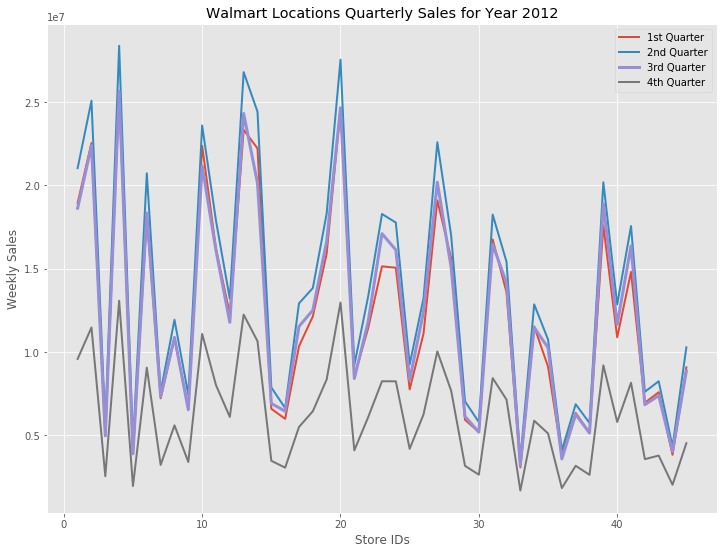

In [59]:
#Creating 2012 quarterly sales results for each Walmart locations
'Locations that require more inventories and human resources'

fig,ax=plt.subplots(figsize=(12,9))
x=range(1,46)
ax.plot(x,quar1_2012_before,linewidth=2.0,label='1st Quarter')
ax.plot(x,quar2_2012_before,linewidth=2.0,label='2nd Quarter')
ax.plot(x,quar3_2012_after,linewidth=3.0,label='3rd Quarter')
ax.plot(x,quar4_2012_before,linewidth=2.0,label='4th Quarter')
ax.set_xlabel('Store IDs')
ax.set_ylabel('Weekly Sales')
ax.legend()
ax.grid(b=True, which='minor', linestyle='-')
ax.set_title("Walmart Locations Quarterly Sales for Year 2012")
plt.show()

In [69]:
# Sales of walmart in holiday weeks [2011,2010 thanksgivings top]
mask_holiday=(walmart_data['Holiday_Flag']==1)
df_holiday_week_sales=walmart_data[mask_holiday]
df_holiday=df_holiday_week_sales.groupby('Date').sum()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending =False).head(10)
df_holiday

,Weekly_Sales
Date,
2011-11-25,66593605.26
2010-11-26,65821003.24
2012-10-02,50009407.92
2010-12-02,48336677.63
2012-07-09,48330059.31
2011-11-02,47336192.79
2011-09-09,46763227.53
2011-12-30,46042461.04
2010-10-09,45634397.84


In [89]:
# Max sales of walmart locations in non_holiday weeks per Week
mask_non_holiday=(walmart_data['Holiday_Flag']==0)
df_non_holiday_week_sales=walmart_data[mask_non_holiday]
df_non_holiday=df_non_holiday_week_sales.groupby('Date').sum()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending =False).head(20)
df_non_holiday

,Weekly_Sales
Date,
2010-12-24,80931415.60
2011-12-23,76998241.31
2010-12-17,61820799.85
2011-12-16,60085695.94
2010-10-12,55666770.39
2011-09-12,55561147.70
2012-06-04,53502315.87
2012-06-07,51253021.88
2010-02-04,50423831.26


In [71]:
#Weekly sale average for non_holiday weeks for all walmart locations
mean_sale_non_holiday_week=df_non_holiday.mean()['Weekly_Sales']
mean_sale_non_holiday_week

59644029.676

In [72]:
# 2011 and 2010 THANKSGIVING holiday week sale for all stores are more than average non_holiday week_sales of all three years for all stores
mask_hol_better=df_holiday.Weekly_Sales> mean_sale_non_holiday_week
better_holidays=df_holiday[mask_hol_better]
better_holidays

,Weekly_Sales
Date,
2011-11-25,66593605.26
2010-11-26,65821003.24


In [73]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


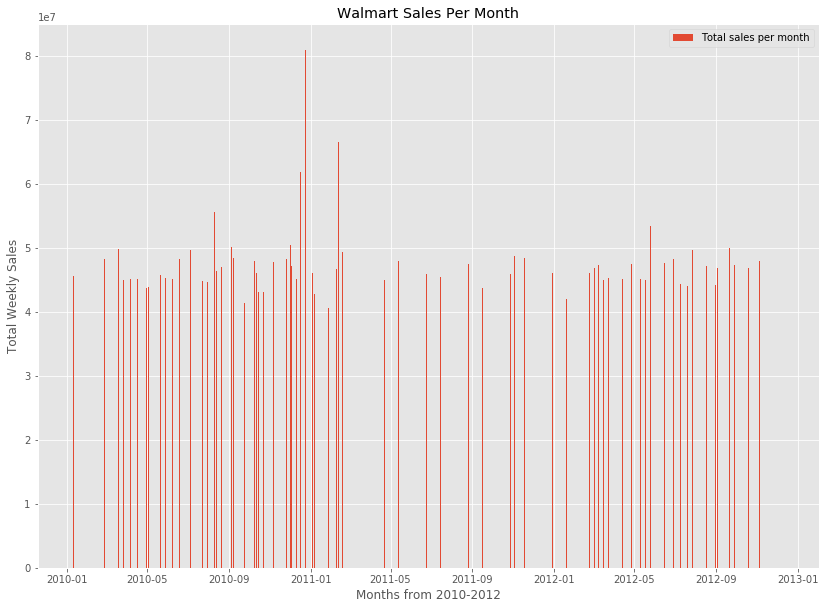

In [76]:
fig,ax=plt.subplots(figsize=(14,10))
sales_monthly_Y=walmart_data.groupby('Date').sum()['Weekly_Sales']
Date_months_x=walmart_data['Date'].unique()
ax.bar(Date_months_x,sales_monthly_Y,label='Total sales per month')
ax.set_xlabel('Months from 2010-2012')
ax.set_ylabel('Total Weekly Sales')
ax.legend()
ax.grid(b=True, which='minor', linestyle='-')
ax.set_title("Walmart Sales Per Month")
plt.show()

In [78]:
#working on semester sales
start1='2010-01-01'
end1='2010-06-30'
start2='2010-07-01'
end2='2010-12-30'
start3='2011-01-01'
end3='2011-06-30'
start4='2011-07-01'
end4='2011-12-30'
start5='2012-01-01'
end5='2012-06-30'
start6='2012-07-01'
end6='2012-12-30'



'''
x=pd.date_range(start='2009-12-30',end='2012-12-30', freq='6M')
sem_x=pd.to_datetime(x, utc=False)
sem_x
'''

"\nx=pd.date_range(start='2009-12-30',end='2012-12-30', freq='6M')\nsem_x=pd.to_datetime(x, utc=False)\nsem_x\n"

In [79]:
sem1=walmart_data[walmart_data.Date.between(start1,end1)]
sem1_data=sem1.groupby('Store').sum()[['Weekly_Sales']]
sem1_data.shape
sem2=walmart_data[walmart_data.Date.between(start2,end2)]
sem2_data=sem2.groupby('Store').sum()[['Weekly_Sales']]
sem2_data.shape
sem3=walmart_data[walmart_data.Date.between(start3,end3)]
sem3_data=sem3.groupby('Store').sum()[['Weekly_Sales']]
sem3_data.shape
sem4=walmart_data[walmart_data.Date.between(start4,end4)]
sem4_data=sem4.groupby('Store').sum()[['Weekly_Sales']]
sem4_data.shape
sem5=walmart_data[walmart_data.Date.between(start5,end5)]
sem5_data=sem5.groupby('Store').sum()[['Weekly_Sales']]
sem5_data.shape
sem6=walmart_data[walmart_data.Date.between(start6,end6)]
sem6_data=sem6.groupby('Store').sum()[['Weekly_Sales']]
sem6_data.shape

(45, 1)

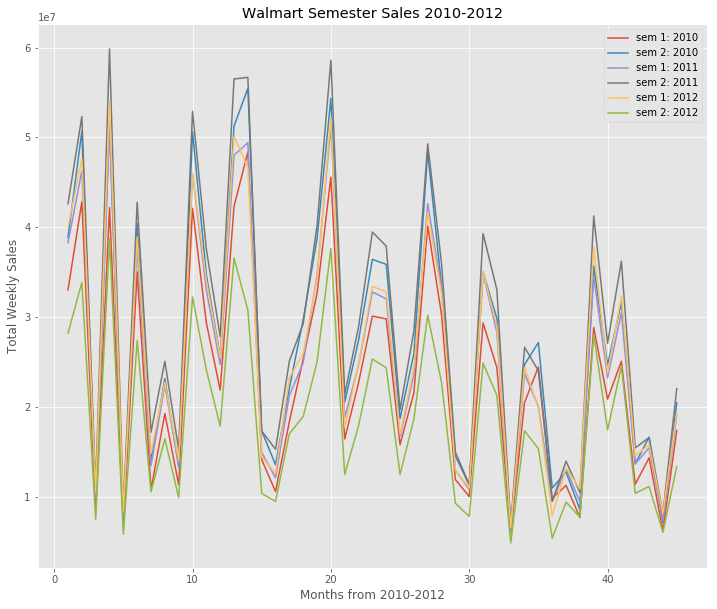

In [80]:
x=range(1,46)
fig,ax=plt.subplots(figsize=(12,10))
ax.plot(x,sem1_data,label='sem 1: 2010')
ax.plot(x,sem2_data,label='sem 2: 2010')
ax.plot(x,sem3_data,label='sem 1: 2011')
ax.plot(x,sem4_data,label='sem 2: 2011')
ax.plot(x,sem5_data,label='sem 1: 2012')
ax.plot(x,sem6_data,label='sem 2: 2012')
ax.set_xlabel('Months from 2010-2012')
ax.set_ylabel('Total Weekly Sales')
ax.legend()
ax.grid(b=True, which='minor', linestyle='-')
ax.set_title("Walmart Semester Sales 2010-2012")
plt.show()

In [81]:
sem1=walmart_data[walmart_data.Date.between(start1,end1)]
sem1_mean=sem1.Weekly_Sales.sum()
print(sem1_mean)
sem2=walmart_data[walmart_data.Date.between(start2,end2)]
sem2_mean=sem2.Weekly_Sales.sum()
print(sem2_mean)
sem3=walmart_data[walmart_data.Date.between(start3,end3)]
sem3_mean=sem3.Weekly_Sales.sum()
print(sem3_mean)
sem4=walmart_data[walmart_data.Date.between(start4,end4)]
sem4_mean=sem4.Weekly_Sales.sum()
print(sem4_mean)
sem5=walmart_data[walmart_data.Date.between(start5,end5)]
sem5_mean=sem5.Weekly_Sales.sum()
print(sem5_mean)
sem6=walmart_data[walmart_data.Date.between(start6,end6)]
sem6_mean=sem6.Weekly_Sales.sum()
print(sem6_mean)
list_sem_sales=[sem1_mean,sem2_mean,sem3_mean,sem4_mean,sem5_mean,sem6_mean]
x=walmart_data.Date.between(start1,end6)
ax.bar(x,sem1_mean)
ax.bar(x,sem2_mean)
ax.bar(x,sem3_mean)
ax.bar(x,sem4_mean)
ax.bar(x,sem5_mean)
ax.bar(x,sem6_mean)
plt.show()

1026912732.34
1221540869.0700002
1138060006.42
1310140000.9299998
1163004064.33
837128795.02


In [91]:
# working on HYPOTHESIS ANALYSIS
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
fuel_price_sort=walmart_data[['Fuel_Price','Weekly_Sales']].sort_values(by ='Fuel_Price',ascending=False)
#mask_fuel=(fuel_price_sort['Fuel_Price'] > 3.0)
#fuel_4above= fuel_price_sort(mask_fuel)
mask1=fuel_price_sort.Fuel_Price>=2.8
mask2=fuel_price_sort.Fuel_Price<2.8
fuel_4above_sales=fuel_price_sort[mask1]
fuel_4above_sales
fuel_4below_sales=fuel_price_sort[mask2]
fuel_4below_sales.Weekly_Sales

6173     292680.16
6174     275020.96
1741    1817887.23
2312     893504.87
2313     833517.19
1740    1907351.20
2454    1115514.61
4027     512292.01
3026     988392.99
3031    1017045.44
3174    1439901.05
3603    1007385.36
3169    1413124.11
5600     959229.09
4032     531640.19
2459    1141860.67
3598    1028151.72
5605     932397.00
4158     462454.39
11      1391256.12
4301    1280465.80
154     1821990.93
297      339976.65
1012     850440.26
726     1540435.99
5445    1280231.85
5159     527019.78
583      288839.73
1441    1283766.55
1155     488683.57
           ...    
4148     497374.57
2861     809321.44
716     1606283.86
5435    1266229.07
1145     552677.48
144     2137809.50
1       1641957.44
5005     467546.74
5029     452021.20
4721     983963.07
431     2049860.26
5006     469563.70
5035     431294.45
5008     447519.44
6008     658997.55
2862     867283.25
2       1611968.17
4292    1473386.75
145     2124451.54
4149     463513.26
1146     511327.90
5436    1230

In [6]:
mean_sale_fuel_4above=fuel_4above_sales.Weekly_Sales.mean()
std_sale_fuel_4above=fuel_4above_sales.Weekly_Sales.std()
print(mean_sale_fuel_4above)
print(std_sale_fuel_4above)

1058456.166818268
572055.7497088856


In [7]:
mean_sale_fuel_4below=fuel_4below_sales.Weekly_Sales.mean()
std_sale_fuel_4below=fuel_4below_sales.Weekly_Sales.std()
print(mean_sale_fuel_4below)
print(std_sale_fuel_4below)

990739.6408424919
521732.9985632322


In [9]:
'''
H0: Null Hypothesis : there is no impact of Fuel price on sales
H1: Alternate Hypothesis: there is an impact of Fuel price on sales
alpha: 0.05 '''

'\nH0: Null Hypothesis : there is no impact of Fuel price on sales\nH1: Alternate Hypothesis: there is an impact of Fuel price on sales\nalpha: 0.05 '

In [8]:
#applying t_test
data1=np.array(fuel_4above_sales.Weekly_Sales)
data2=np.array(fuel_4below_sales.Weekly_Sales)
from scipy.stats import ttest_ind

In [9]:
# compare samples
#2.8 is the critical point
#reject null hypothesis for 2.6,2.7,2.8
#fail to reject null hypothesis for 2.9,3.0,3.1
stat, p = ttest_ind(data1, data2,equal_var=False)
print('t=%.3f, p=%.3f' % (stat, p))

t=3.843, p=0.000


In [14]:
fuel=walmart_data.Fuel_Price.max()
fuel2=walmart_data.Fuel_Price.min()
print(fuel,fuel2)
fuel3=walmart_data.Fuel_Price.unique()
print(len(fuel3))

4.468 2.472
892


In [ ]:
#plot a graph showing sales for fuel price below 2.8 and above 2.8
fig,ax=plt.subplots(figsize=(12,6))
yaxis=fuel_4above_sales[['Weekly_Sales']]
z=fuel_4below_sales[['Weekly_Sales']]
x=range(int(yaxis.min()),int(yaxis.max()))
ax.bar(x,yaxis)

In [47]:
unemploy_sort=walmart_data[['Unemployment','Weekly_Sales']].sort_values(by ='Unemployment',ascending=False)
#mask_fuel=(fuel_price_sort['Fuel_Price'] > 3.0)
#fuel_4above= fuel_price_sort(mask_fuel)
mask1=unemploy_sort.Unemployment>=4.5
mask2=unemploy_sort.Unemployment<4.5
high_unemploy_sale=unemploy_sort[mask1]
high_unemploy_sale
low_unemploy_sale=unemploy_sort[mask2]
low_unemploy_sale

,Unemployment,Weekly_Sales
5664,4.420,1070389.98
5666,4.420,942319.65
5667,4.420,941675.95
5668,4.420,1011321.18
5669,4.420,1037687.07
5670,4.420,905399.99
5671,4.420,1230011.95
5673,4.420,1158708.98
5674,4.420,1198670.19
5675,4.420,1601585.70


In [48]:
print(walmart_data.Unemployment.max())
print(walmart_data.Unemployment.min())

14.312999999999999
3.8789999999999996


In [49]:
mean_sale_high_employ=high_unemploy_sale.Weekly_Sales.mean()
std_sale_high_employ=high_unemploy_sale.Weekly_Sales.std()
print(mean_sale_high_employ)
print(std_sale_high_employ)

1038809.4668441107
563594.0610654072


In [50]:
mean_sale_low_employ=low_unemploy_sale.Weekly_Sales.mean()
std_sale_low_employ=low_unemploy_sale.Weekly_Sales.std()
print(mean_sale_low_employ)
print(std_sale_low_employ)

1408387.4102816903
474482.6279616408


In [51]:
#applying t_test
data1=np.array(high_unemploy_sale.Weekly_Sales)
data2=np.array(low_unemploy_sale.Weekly_Sales)
from scipy.stats import ttest_ind

In [119]:

unemploy_sort=walmart_data[['Unemployment','Weekly_Sales']].sort_values(by ='Unemployment',ascending=False)
#mask_fuel=(fuel_price_sort['Fuel_Price'] > 3.0)
#fuel_4above= fuel_price_sort(mask_fuel)
#14.18 is the critical point
mask1=unemploy_sort.Unemployment>=6
mask2=unemploy_sort.Unemployment<6
high_unemploy_sale=unemploy_sort[mask1]
high_unemploy_sale
low_unemploy_sale=unemploy_sort[mask2]
low_unemploy_sale
#applying t_test
data1=np.array(high_unemploy_sale.Weekly_Sales)
data2=np.array(low_unemploy_sale.Weekly_Sales)
from scipy.stats import ttest_ind
# compare samples
#reject null hypothesis for 2.6,2.7,2.8
#fail to reject null hypothesis for 2.9,3.0,3.1
stat, p = ttest_ind(data1, data2,equal_var=False)
print('t=%.3f, p=%.3f' % (stat, p))

t=-5.909, p=0.000


In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
yaxis=fuel_4above_sales[['Weekly_Sales']].sum()
z=fuel_4below_sales[['Weekly_Sales']].mean()
labels=['Fuel above 2.8','Fuel below 2.8']
ax.set_xticklabels(labels, fontsize=10)
ax.bar(labels,yaxis)


In [53]:
cpi_sort=walmart_data[['CPI','Weekly_Sales']].sort_values(by ='CPI',ascending=False)
#mask_fuel=(fuel_price_sort['Fuel_Price'] > 3.0)
#fuel_4above= fuel_price_sort(mask_fuel)
#226.55 is the critical point
mask1=cpi_sort.CPI>=226.55
mask2=cpi_sort.CPI<226.55
high_cpi_sale=cpi_sort[mask1]
high_cpi_sale
low_cpi_sale=cpi_sort[mask2]
low_cpi_sale
#applying t_test
data1=np.array(high_cpi_sale.Weekly_Sales)
data2=np.array(low_cpi_sale.Weekly_Sales)
from scipy.stats import ttest_ind
# compare samples
#reject null hypothesis for 2.6,2.7,2.8
#fail to reject null hypothesis for 2.9,3.0,3.1
stat, p = ttest_ind(data1, data2,equal_var=False)
print('t=%.3f, p=%.3f' % (stat, p))

t=-3.533, p=0.002


In [54]:
walmart_data.CPI.max()

227.2328068

In [55]:
walmart_data.CPI.min()

126.064

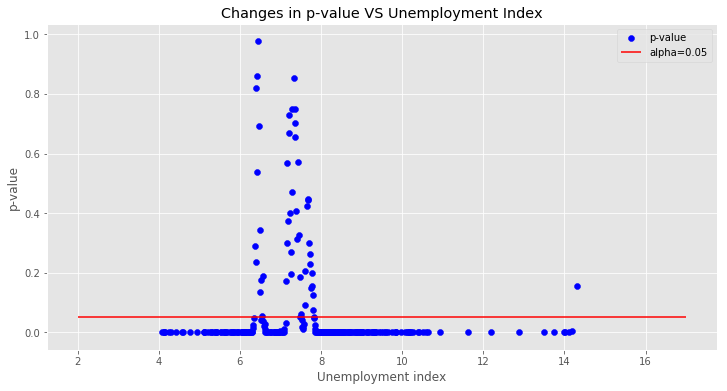

In [37]:
from scipy.stats import ttest_ind
fig,ax=plt.subplots(figsize=(12,6))
walmart_data.Unemployment=np.round(walmart_data.Unemployment,2)
x=walmart_data.Unemployment.unique()
def p_value_unemployment (x):
    unemploy_sort=walmart_data[['Unemployment','Weekly_Sales']].sort_values(by ='Unemployment',ascending=False) 
    p_list=[]
    for i in x:
        mask1=unemploy_sort.Unemployment>=i
        mask2=unemploy_sort.Unemployment<i
        high_unemploy_sale=unemploy_sort[mask1]
        high_unemploy_sale
        low_unemploy_sale=unemploy_sort[mask2]
        low_unemploy_sale
        data1=np.array(high_unemploy_sale.Weekly_Sales)
        data2=np.array(low_unemploy_sale.Weekly_Sales)
        stat, p = ttest_ind(data1, data2,equal_var=False)
        p_list.append(p)
    return p_list
p_value_list=p_value_unemployment(x)
ax.scatter(x,p_value_list,label='p-value',c='b')
plt.hlines(0.05,2,17,colors='r',label='alpha=0.05')
ax.set_xlabel('Unemployment index')
ax.set_ylabel('p-value')
ax.legend()
ax.grid(b=True, which='minor', linestyle='-')
ax.set_title("Changes in p-value VS Unemployment Index")
plt.show()

In [14]:
x=walmart_data.Unemployment.unique()
print(np.sort(x))

[ 3.879  4.077  4.125  4.145  4.156  4.261  4.308  4.42   4.584  4.607
  4.781  4.954  5.114  5.124  5.143  5.217  5.277  5.287  5.326  5.329
  5.401  5.407  5.422  5.435  5.527  5.539  5.603  5.621  5.644  5.667
  5.668  5.679  5.765  5.774  5.801  5.825  5.847  5.892  5.936  5.943
  5.946  5.964  5.965  6.034  6.054  6.061  6.078  6.104  6.123  6.132
  6.162  6.169  6.17   6.195  6.228  6.232  6.235  6.262  6.29   6.297
  6.299  6.3    6.315  6.334  6.338  6.339  6.38   6.384  6.392  6.403
  6.404  6.415  6.416  6.425  6.432  6.433  6.442  6.465  6.489  6.496
  6.51   6.529  6.547  6.548  6.551  6.56   6.565  6.566  6.573  6.589
  6.614  6.617  6.623  6.634  6.635  6.664  6.697  6.745  6.759  6.768
  6.774  6.833  6.842  6.855  6.858  6.866  6.868  6.877  6.885  6.891
  6.895  6.901  6.906  6.908  6.925  6.934  6.943  6.961  6.973  6.986
  6.989  7.007  7.039  7.057  7.082  7.092  7.127  7.138  7.139  7.143
  7.147  7.17   7.193  7.197  7.224  7.241  7.244  7.259  7.274  7.28
  7.287

/Users/nivzz/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/nivzz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


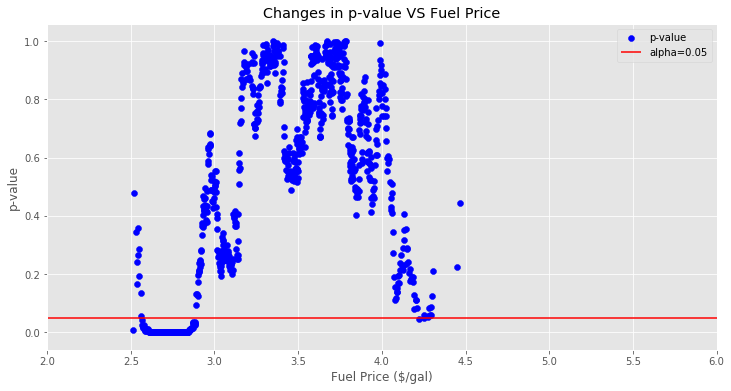

In [22]:
from scipy.stats import ttest_ind
fig,ax=plt.subplots(figsize=(12,6))
x=walmart_data.Fuel_Price.unique()
def p_value_unemployment (x):
    fuel_price_sort=walmart_data[['Fuel_Price','Weekly_Sales']].sort_values(by ='Fuel_Price',ascending=False) 
    p_list=[]
    for i in x:
        mask1=fuel_price_sort.Fuel_Price>=i
        mask2=fuel_price_sort.Fuel_Price<i
        fuel_4above_sales=fuel_price_sort[mask1]
        fuel_4above_sales
        fuel_4below_sales=fuel_price_sort[mask2]
        fuel_4below_sales.Weekly_Sales
        data1=np.array(fuel_4above_sales.Weekly_Sales)
        data2=np.array(fuel_4below_sales.Weekly_Sales)
        stat, p = ttest_ind(data1, data2,equal_var=False)
        p_list.append(p)
    return p_list
p_value_list=p_value_unemployment(x)
ax.scatter(x,p_value_list,c='b',label='p-value')
ax.set_xlabel('Fuel Price ($/gal)')
ax.set_ylabel('p-value')
ax.set_xlim(2,6)
plt.hlines(0.05,2,17,colors='r',label='alpha=0.05')
ax.legend()
ax.grid(b=True, which='minor', color='k', linestyle='-')
ax.set_title("Changes in p-value VS Fuel Price")
plt.show()

In [17]:
np.sort(x)

array([2.472, 2.513, 2.514, 2.52 , 2.533, 2.539, 2.54 , 2.542, 2.545,
       2.548, 2.55 , 2.561, 2.562, 2.565, 2.567, 2.572, 2.573, 2.574,
       2.577, 2.578, 2.58 , 2.582, 2.584, 2.586, 2.59 , 2.594, 2.595,
       2.596, 2.598, 2.601, 2.602, 2.603, 2.604, 2.606, 2.608, 2.612,
       2.615, 2.619, 2.62 , 2.621, 2.623, 2.624, 2.625, 2.627, 2.633,
       2.635, 2.637, 2.64 , 2.642, 2.644, 2.645, 2.65 , 2.653, 2.654,
       2.655, 2.664, 2.666, 2.667, 2.668, 2.669, 2.671, 2.674, 2.68 ,
       2.681, 2.684, 2.689, 2.69 , 2.691, 2.692, 2.694, 2.698, 2.699,
       2.7  , 2.701, 2.704, 2.705, 2.706, 2.707, 2.708, 2.711, 2.712,
       2.713, 2.715, 2.716, 2.717, 2.718, 2.719, 2.72 , 2.723, 2.725,
       2.727, 2.728, 2.729, 2.731, 2.732, 2.733, 2.735, 2.736, 2.737,
       2.74 , 2.741, 2.742, 2.743, 2.745, 2.747, 2.748, 2.75 , 2.752,
       2.753, 2.754, 2.755, 2.756, 2.758, 2.759, 2.762, 2.764, 2.765,
       2.766, 2.767, 2.769, 2.77 , 2.771, 2.773, 2.776, 2.777, 2.778,
       2.779, 2.78 ,

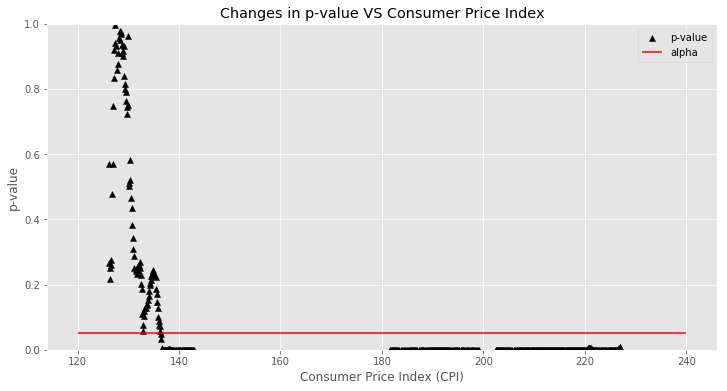

<Figure size 432x288 with 0 Axes>

In [36]:
from scipy.stats import ttest_ind
fig,ax=plt.subplots(figsize=(12,6))
walmart_data.CPI=np.round(walmart_data.CPI,1)
x=walmart_data.CPI.unique()
def p_value_unemployment (x):
    cpi_sort=walmart_data[['CPI','Weekly_Sales']].sort_values(by ='CPI',ascending=False) 
    p_list=[]
    for i in x:
        mask1=cpi_sort.CPI>=i
        mask2=cpi_sort.CPI<i
        high_cpi_sale=cpi_sort[mask1]
        high_cpi_sale
        low_cpi_sale=cpi_sort[mask2]
        low_cpi_sale
        #applying t_test
        data1=np.array(high_cpi_sale.Weekly_Sales)
        data2=np.array(low_cpi_sale.Weekly_Sales)
        stat, p = ttest_ind(data1, data2,equal_var=False)
        p_list.append(p)
    return p_list

alpha=0.05
p_value_list=p_value_unemployment(x)
#p_list_impact=[i for i in p_value_list if i<0.05]
#p_list_noimpact=[i for i in p_value_list if i>=0.05]
ax.scatter(x,p_value_list,c='k',marker='^',label='p-value')
plt.hlines(alpha,120,240,colors='r',label='alpha')
ax.set_xlabel('Consumer Price Index (CPI)')
ax.set_ylabel('p-value')
ax.set_ylim(0.0,1)
ax.set_title("Changes in p-value VS Consumer Price Index")
ax.legend()
plt.show()
plt.tight_layout()

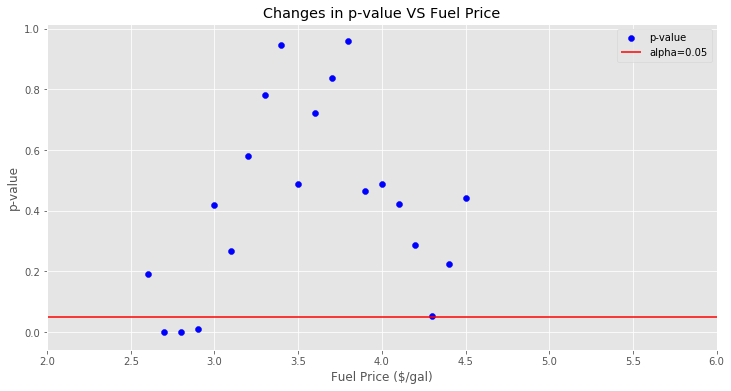

In [34]:
from scipy.stats import ttest_ind
fig,ax=plt.subplots(figsize=(12,6))
walmart_data.Fuel_Price=np.round(walmart_data.Fuel_Price,2)
x=walmart_data.Fuel_Price.unique()
def p_value_unemployment (x):
    fuel_price_sort=walmart_data[['Weekly_Sales','Fuel_Price']].sort_values(by ='Fuel_Price',ascending=False) 
    p_list=[]
    for i in x:
        mask1=fuel_price_sort.Fuel_Price>=i
        mask2=fuel_price_sort.Fuel_Price<i
        fuel_4above_sales=fuel_price_sort[mask1]
        fuel_4above_sales
        fuel_4below_sales=fuel_price_sort[mask2]
        fuel_4below_sales.Weekly_Sales
        data1=np.array(fuel_4above_sales.Weekly_Sales)
        data2=np.array(fuel_4below_sales.Weekly_Sales)
        stat, p = ttest_ind(data1, data2,equal_var=False)
        p_list.append(p)
    return p_list
p_value_list=p_value_unemployment(x)
ax.scatter(x,p_value_list,c='b',label='p-value')
ax.set_xlabel('Fuel Price ($/gal)')
ax.set_ylabel('p-value')
ax.set_xlim(2,6)
plt.hlines(0.05,2,17,colors='r',label='alpha=0.05')
ax.legend()
ax.grid(b=True, which='minor', color='k', linestyle='-')
ax.set_title("Changes in p-value VS Fuel Price")
plt.show()

/Users/nivzz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5001: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


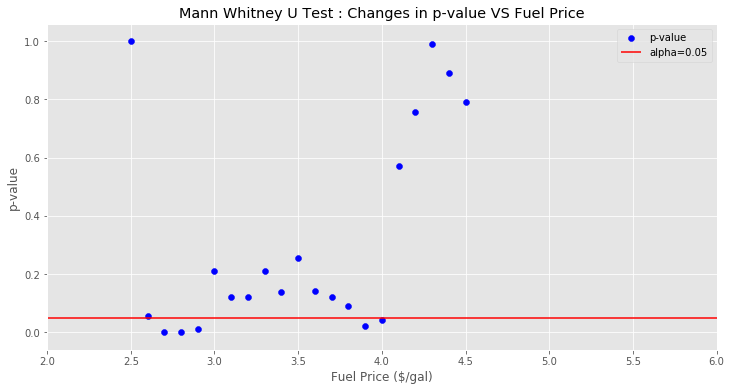

In [39]:
from scipy.stats import mannwhitneyu
fig,ax=plt.subplots(figsize=(12,6))
walmart_data.Fuel_Price=np.round(walmart_data.Fuel_Price,2)
x=walmart_data.Fuel_Price.unique()
def p_value_unemployment (x):
    fuel_price_sort=walmart_data[['Weekly_Sales','Fuel_Price']].sort_values(by ='Fuel_Price',ascending=False) 
    p_list=[]
    for i in x:
        mask1=fuel_price_sort.Fuel_Price>=i
        mask2=fuel_price_sort.Fuel_Price<i
        fuel_4above_sales=fuel_price_sort[mask1]
        fuel_4above_sales
        fuel_4below_sales=fuel_price_sort[mask2]
        fuel_4below_sales.Weekly_Sales
        data1=np.array(fuel_4above_sales.Weekly_Sales)
        data2=np.array(fuel_4below_sales.Weekly_Sales)
        stat, p = mannwhitneyu(data1, data2,alternative='greater')
        p_list.append(p)
    return p_list
p_value_list=p_value_unemployment(x)
ax.scatter(x,p_value_list,c='b',label='p-value')
ax.set_xlabel('Fuel Price ($/gal)')
ax.set_ylabel('p-value')
ax.set_xlim(2,6)
plt.hlines(0.05,2,17,colors='r',label='alpha=0.05')
ax.legend()
ax.grid(b=True, which='minor', color='k', linestyle='-')
ax.set_title("Mann Whitney U Test : Changes in p-value VS Fuel Price")
plt.show()

In [26]:
walmart_data.Fuel_Price=np.round(walmart_data.Fuel_Price,2)
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/10,1643690.90,0,42.31,2.57,211.096358,8.106
1,1,12/2/10,1641957.44,1,38.51,2.55,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.319643,8.106
4,1,5/3/10,1554806.68,0,46.50,2.62,211.350143,8.106


In [13]:
# A/B testing
mask_fuel1=walmart_data.Weekly_Sales<=np.mean(walmart_data.Weekly_Sales)

In [14]:
sample1=walmart_data[mask_fuel1].Weekly_Sales
print(len(np.array(sample1)))

3559


In [8]:
mask_fuel2=walmart_data.Weekly_Sales>np.mean(walmart_data.Weekly_Sales)

In [9]:
sample2=walmart_data[mask_fuel2].Weekly_Sales

In [10]:
print(len(np.array(sample2)))

2876


In [38]:
avg=walmart_data.Weekly_Sales.mean()
print(avg)

1046964.8775617732


In [15]:
n1=400
k1=len(sample1)-n1
failure1=n1-k1
print(failure1,n1,k1)

-2759 400 3159


In [40]:

n2=len(sample2)
k2=len(success2)
failure2=n2-k2
print(failure2,n2,k2)

1373 2514 1141


2186 1373


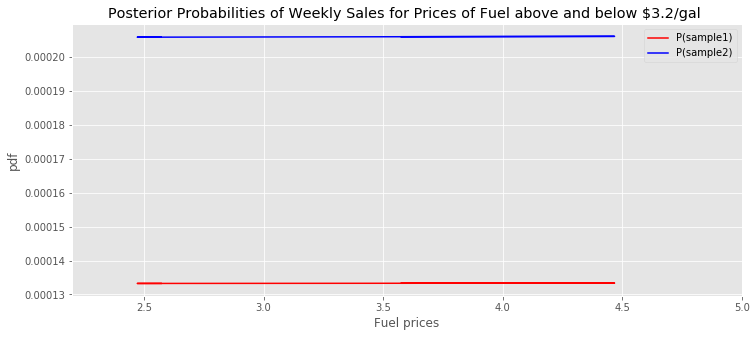

In [41]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(12,5))
x =np.round(walmart_data.Fuel_Price,2).unique()
for (a,b,s, label) in [(1 + k1, 1 + failure1,"r", "P(sample1)"),(1 + k2, 1 + failure2,"b", "P(sample2)")]:
    ax.plot(x,stats.norm(a,b).pdf(x),s,label=label)
ax.legend(loc="upper right")
ax.set_xlabel("Fuel prices")
ax.set_ylabel("pdf")
ax.set_xlim(2.2,5)
ax.set_title("Posterior Probabilities of Weekly Sales for Prices of Fuel above and below $3.2/gal ");
print(failure1,failure2)

525 1132 607
2764 5303 2539
525 2764


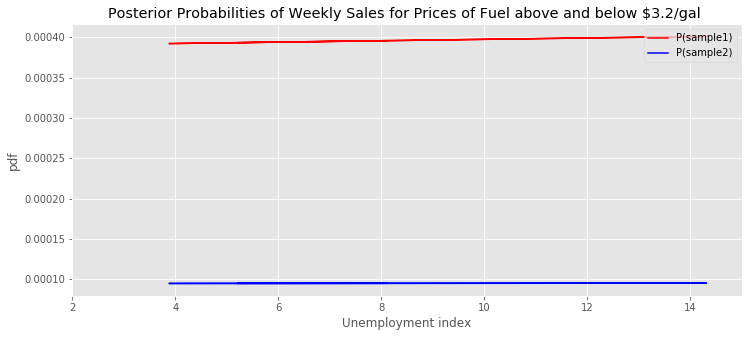

In [36]:
mask_fuel1=walmart_data.Unemployment>9.0
sample1=walmart_data[mask_fuel1].Weekly_Sales
mask_fuel2=walmart_data.Unemployment<=9.0
sample2=walmart_data[mask_fuel2].Weekly_Sales
avg=walmart_data.Weekly_Sales.mean()

success1=sample1[sample1>699999]
n1=len(sample1)
k1=len(success1)
failure1=n1-k1
print(failure1,n1,k1)

success2=sample2[sample2>avg]
n2=len(sample2)
k2=len(success2)
failure2=n2-k2
print(failure2,n2,k2)

import scipy.stats as stats
fig, ax = plt.subplots(figsize=(12,5))
x =walmart_data.Unemployment.unique()
for (a,b,s, label) in [(1 + k1, 1 + failure1,"r", "P(sample1)"),(1 + k2, 1 + failure2,"b", "P(sample2)")]:
    ax.plot(x,stats.norm(a,b).pdf(x),s,label=label)
ax.legend(loc="upper right")
ax.set_xlabel("Unemployment index")
ax.set_ylabel("pdf")
ax.set_xlim(2,15)
ax.set_title("Posterior Probabilities of Weekly Sales for Prices of Fuel above and below $3.2/gal ");
print(failure1,failure2)

In [45]:
len(walmart_data.Fuel_Price)

6435

In [9]:
x=walmart_data.Holiday_Flag
y=np.array(x)
holiday=sum(y)
holiday
non_holiday=len(x)-holiday
print(holiday, non_holiday)

450 5985


In [19]:
mask_holiday=walmart_data.Holiday_Flag==1
sales_total=walmart_data[mask_holiday].Weekly_Sales.sum()
sales_total

505299551.56

In [16]:
mask_nonholiday=walmart_data.Holiday_Flag==0
sales_total_non=walmart_data[mask_nonholiday].Weekly_Sales.sum()
sales_total_non

6231919435.55

In [65]:
x=sales_total/holiday
x

1122887.8923555557

In [64]:
y=sales_total_non/non_holiday
y

1041256.3802088555

1.0783971303305018

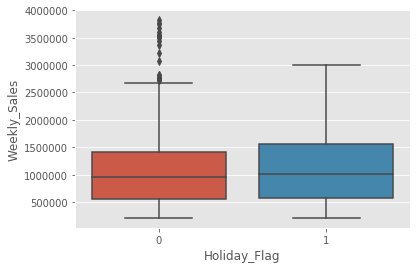

In [30]:
import seaborn as sns
sns.boxplot(x=walmart_data.Holiday_Flag,y=walmart_data.Weekly_Sales,data=walmart_data)






In [226]:
import datetime as dt
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])
walmart_data['Date']=walmart_data['Date'].map(dt.datetime.toordinal)
x_features=walmart_data[['Date']]
type(x_features)

pandas.core.frame.DataFrame

In [227]:
y_target=walmart_data[['Weekly_Sales']]
y_target.head()

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68


In [218]:
x_features.shape

(6435, 1)

In [219]:
y_target.shape

(6435, 1)

In [220]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_features,y_target,random_state=30)

In [221]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4826, 1) (1609, 1) (4826, 1) (1609, 1)


In [222]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [223]:
print(linreg.intercept_)
print(linreg.coef_)

[1046844.25660174]
[[0.]]


In [228]:
y_pred=linreg.predict(x_test)
y_pred

array([[1046844.25660174],
       [1046844.25660174],
       [1046844.25660174],
       ...,
       [1046844.25660174],
       [1046844.25660174],
       [1046844.25660174]])

In [229]:
from sklearn import metrics
import numpy as np

In [230]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

552576.5425448267
